In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model 
from keras.utils import to_categorical


Using TensorFlow backend.


Read the data
===========

In [2]:
x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

x_original=x_original[['Unnamed: 0','L102900', 'L103200', 'L103300', 'L103000', 'AGE', 'L100100', 'S000300', 'L100700', 
                       'L104600', 'L101700', 'S000502', 'L100200', 'L190500', 'S000501', 'L190400', 'L100800', 'L101100',
                        'FIELD_21', 'FIELD_33', 'FIELD_14', 'FIELD_27', 'FIELD_4', 'FIELD_28', 
                       'FIELD_38', 'FIELD_25', 'FIELD_20', 'FIELD_31'
#                        'FIELD_7','FIELD_6', 
                      ]]

y_original=y_original[['Unnamed: 0','L102900', 'L103200', 'L103300', 'L103000', 'AGE', 'L100100', 'S000300', 'L100700', 
                       'L104600', 'L101700', 'S000502', 'L100200', 'L190500', 'S000501', 'L190400', 'L100800', 'L101100',
                       'FIELD_21', 'FIELD_33', 'FIELD_14', 'FIELD_27', 'FIELD_4', 'FIELD_28', 
                       'FIELD_38', 'FIELD_25', 'FIELD_20', 'FIELD_31'
#                        'FIELD_7', 'FIELD_6', 
                      ]]

print(x_original.shape)
print(y_original.shape)


(159381, 28)
(159381, 28)


In [3]:
for index,col in enumerate(x_original.columns):
    print(col,x_original[col].dropna().shape[0])

Unnamed: 0 159381
L102900 158941
L103200 158879
L103300 135222
L103000 158939
AGE 159381
L100100 148548
S000300 159075
L100700 152474
L104600 56437
L101700 158951
S000502 159305
L100200 148627
L190500 159204
S000501 159305
L190400 159241
L100800 159236
L101100 77885
FIELD_21 159366
FIELD_33 159069
FIELD_14 159361
FIELD_27 159365
FIELD_4 156956
FIELD_28 159366
FIELD_38 159077
FIELD_25 159366
FIELD_20 159364
FIELD_31 159366


Prepare the data
============

In [4]:
df=x_original.copy()
conditions = [
    (df.S000501 < 120)  ,
    (df.S000501 >= 120) & (df.S000501 < 130),
    (df.S000501 >=130)]
choices = [0,1,2]
df['sbpG'] = np.select(conditions, choices, default=0)
df.head()
x_original=df.copy()

conditions2 = [
    (df.S000502 < 80)  ,
    (df.S000502 >= 80) & (df.S000502 < 90),
    (df.S000502 >=90)]
choices2 = [0,1,2]
df['dbpG'] = np.select(conditions2, choices2, default=0)
df.head()
x_original=df.copy()

conditions3 = [
    (df.AGE < 30)  ,
    (df.AGE >= 30) & (df.AGE < 40),
    (df.AGE >= 40) & (df.AGE < 50),
    (df.AGE >= 50) & (df.AGE < 60),
    (df.AGE >= 60)]
choices3 = [0,1,2,3,4]
df['AgeG'] = np.select(conditions3, choices3, default=0)
df.head()
x_original=df.copy()


conditions4 = [
    (df.L100800 < 100)  ,
    (df.L100800 >= 100) & (df.L100800 < 126), 
    (df.L100800 >= 126)]
choices4 = [0,1,2]
df['CLASS'] = np.select(conditions4, choices4, default=0)
df.head()
x_original=df.copy()

In [5]:
data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data=data.dropna(). reset_index()

# data=data[data.AGE_x >= 40]
# data=data[data.AGE_x < 50]

# data=data[data.CLASS_x==0]
# data=data[data.sbpG==0]
# data=data[data.dbpG==0]

# data=data[data.L100800_y <200]

print(data.shape)

(18901, 60)


In [6]:
print(data.shape)
print(data.columns)
data.head()

(18901, 60)
Index(['index', 'Unnamed: 0', 'L102900_x', 'L103200_x', 'L103300_x',
       'L103000_x', 'AGE_x', 'L100100_x', 'S000300_x', 'L100700_x',
       'L104600_x', 'L101700_x', 'S000502_x', 'L100200_x', 'L190500_x',
       'S000501_x', 'L190400_x', 'L100800_x', 'L101100_x', 'FIELD_21_x',
       'FIELD_33_x', 'FIELD_14_x', 'FIELD_27_x', 'FIELD_4_x', 'FIELD_28_x',
       'FIELD_38_x', 'FIELD_25_x', 'FIELD_20_x', 'FIELD_31_x', 'sbpG', 'dbpG',
       'AgeG', 'CLASS', 'L102900_y', 'L103200_y', 'L103300_y', 'L103000_y',
       'AGE_y', 'L100100_y', 'S000300_y', 'L100700_y', 'L104600_y',
       'L101700_y', 'S000502_y', 'L100200_y', 'L190500_y', 'S000501_y',
       'L190400_y', 'L100800_y', 'L101100_y', 'FIELD_21_y', 'FIELD_33_y',
       'FIELD_14_y', 'FIELD_27_y', 'FIELD_4_y', 'FIELD_28_y', 'FIELD_38_y',
       'FIELD_25_y', 'FIELD_20_y', 'FIELD_31_y'],
      dtype='object')


,index,Unnamed: 0,L102900_x,L103200_x,L103300_x,L103000_x,AGE_x,L100100_x,S000300_x,L100700_x,...,FIELD_21_y,FIELD_33_y,FIELD_14_y,FIELD_27_y,FIELD_4_y,FIELD_28_y,FIELD_38_y,FIELD_25_y,FIELD_20_y,FIELD_31_y
0,2,2,243.0,163.0,3.4,41.0,46.0,7.8,20.2,3.8,...,0.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
1,4,4,170.0,102.0,2.9,50.0,52.0,6.4,25.5,3.4,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
2,7,7,225.0,139.0,2.9,45.0,37.0,6.5,21.2,3.9,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
3,8,8,145.0,87.0,3.1,54.0,39.0,6.8,22.0,4.2,...,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
4,59,59,154.0,90.0,2.8,42.0,19.0,6.9,18.5,3.1,...,0.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0


In [8]:
x=data[['L102900_x', 'L103200_x', 'L103300_x', 'L103000_x', 'AGE_x', 'L100100_x', 'S000300_x', 'L100700_x', 
                       'L104600_x', 'L101700_x', 'S000502_x', 'L100200_x', 'L190500_x', 'S000501_x', 'L190400_x', 'L100800_x', 'L101100_x',
                        'FIELD_21_x', 'FIELD_33_x', 'FIELD_14_x', 'FIELD_27_x', 'FIELD_4_x', 'FIELD_28_x', 
                       'FIELD_38_x', 'FIELD_25_x', 'FIELD_20_x', 'FIELD_31_x',
        #                        , 'FIELD_6'
        'CLASS','sbpG','dbpG','AgeG']]

y=data[['L102900_y', 'L103200_y', 'L103300_y', 'L103000_y', 'AGE_y', 'L100100_y', 'S000300_y', 'L100700_y', 
                       'L104600_y', 'L101700_y', 'S000502_y', 'L100200_y', 'L190500_y', 'S000501_y', 'L190400_y', 'L100800_y', 'L101100_y',
                        'FIELD_21_y', 'FIELD_33_y', 'FIELD_14_y', 'FIELD_27_y', 'FIELD_4_y', 'FIELD_28_y', 
                       'FIELD_38_y', 'FIELD_25_y', 'FIELD_20_y', 'FIELD_31_y'
        #                        , 'FIELD_6'
        ]]

Check the correlation of the selected feature with the independent variables
=====

In [10]:
temppd=pd.DataFrame(x.copy())
temppd['y']=y.L102900_y
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)

In [11]:
corval.y

y             1.000000
L102900_x     0.731292
L103200_x     0.649145
L103300_x     0.447048
L103000_x     0.265545
S000300_x     0.204878
L101100_x     0.202592
L101700_x     0.189118
L104600_x     0.185298
L100800_x     0.169336
L100700_x     0.167690
AGE_x         0.154920
S000501_x     0.151405
AgeG          0.151030
L190500_x     0.144081
S000502_x     0.143208
L190400_x     0.141187
sbpG          0.140504
CLASS         0.137921
dbpG          0.110261
FIELD_33_x    0.098849
L100100_x     0.091279
FIELD_38_x    0.082089
L100200_x     0.073580
FIELD_14_x    0.049661
FIELD_21_x    0.047761
FIELD_4_x     0.043971
FIELD_25_x    0.028447
FIELD_28_x    0.027904
FIELD_31_x    0.024694
FIELD_27_x    0.016739
FIELD_20_x    0.007182
Name: y, dtype: float64

In [12]:
#histogram plot of the features
# import matplotlib.pyplot as plt
# x[x.dtypes[(x.dtypes=="float64")|(x.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11])

Apply PCA
===========

In [13]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# pca.fit(x)

# print(pca.explained_variance_ratio_)   
# print(np.sum(pca.explained_variance_ratio_))

# x=pca.fit_transform(x) 
# print(x.shape)


feature scaling
=======

In [14]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()  #StandardScaler()
# x = min_max_scaler.fit_transform(x)

clustring test
==========

In [15]:
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# K = range(1,10)
# distortions = []

# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(x)
#     kmeanModel.fit(x)
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()


In [16]:
# kmeanModel = KMeans(n_clusters=k).fit(x)
# x['lbl']=kmeanModel.labels_ 

In [17]:
# x.columns

Random Forest Regressor
=============

In [18]:
ylable=y[['L102900_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [19]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=500)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[8.91298628e-01 5.25547497e-03 1.05239762e-02 1.13727464e-02
 4.45916766e-03 1.19549116e-02 4.52301140e-03 4.47716188e-03
 5.02526269e-03 4.94324364e-03 2.10654745e-03 2.10038209e-02
 4.72236977e-03 3.69221834e-03 3.01687890e-03 4.70623895e-03
 2.31665184e-03 8.77993056e-05 4.14163407e-04 1.12363681e-04
 2.61598599e-04 8.44936969e-04 2.53275357e-04 1.31516536e-03
 2.19139472e-04 0.00000000e+00 2.68851956e-04 1.38593080e-04
 1.48872603e-04 1.33731463e-04 4.03198180e-04]


mean_squared_error 532.8966336034014
root mean_squared_error 23.08455400486224
mean_absolute_error 17.69724330329041
r2_score 0.5373214628210736


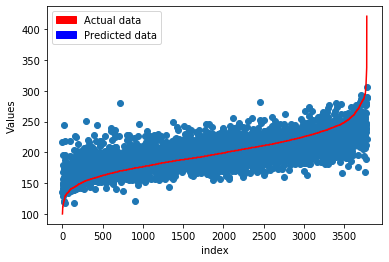

,t + 1,pred (t +1)
1298,313.0,244.382383
290,316.0,239.168621
2460,318.0,232.498030
3252,320.0,263.352578
1526,324.0,280.582591
134,330.0,237.372227
1394,333.0,289.086337
331,334.0,221.894382
1718,338.0,288.133601
482,421.0,306.453339


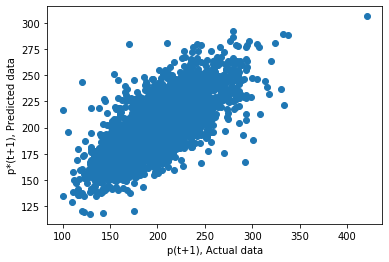

In [20]:

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [21]:
# tempdata=pd.DataFrame(xtest.copy())
# tempdata['ytest']=ytest
# # temp=temp.dropna()
# # tempdata.head()
# # tempdata[tempdata.ytest.isna()].index

# tempdata=tempdata.drop(tempdata[tempdata.ytest.isna()].index)


xg boost
==========

In [22]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np

In [23]:
xg_reg = xgb.XGBRegressor()
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain, ytrain) 

[23:32:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [24]:

ypred = xg_reg.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

# ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
# ypredPD['t + 1']=ytest.values
# ypredPD['pred (t +1)']=ypred
# ypredPD.head(10)

mean_squared_error 524.0116605983067
root mean_squared_error 22.89130098090335
mean_absolute_error 17.570328925091637
r2_score 0.5450356911603935


In [25]:
# ytest[ytest.isna()].shape
# tempdata.iloc[:,-1]

ANN
==========

In [26]:
model= Sequential()
model.add(Dense(input_dim=31,units=128,activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform')) 
# model.add(BatchNormalization())
# model.add(Dropout(0.25))  
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=1, kernel_initializer='uniform'))
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error' ])

W1003 23:32:12.284086 13888 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1003 23:32:12.295031 13888 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 23:32:12.297026 13888 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1003 23:32:12.384212 13888 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1003 23:32:12.402817 13888 deprecation.py:506

In [27]:
h=model.fit(xtrain, ytrain, validation_split=.2,epochs=100, batch_size=50)

W1003 23:32:12.900465 13888 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 12096 samples, validate on 3024 samples
Epoch 1/100
12096/12096 [==============================] - 1s 73us/step - loss: 34242.8010 - mean_squared_error: 34242.8010 - val_loss: 19774.9159 - val_mean_squared_error: 19774.9159
Epoch 2/100
12096/12096 [==============================] - 0s 23us/step - loss: 7337.4176 - mean_squared_error: 7337.4176 - val_loss: 15058.0954 - val_mean_squared_error: 15058.0954
Epoch 3/100
12096/12096 [==============================] - 0s 26us/step - loss: 2759.0275 - mean_squared_error: 2759.0275 - val_loss: 2025.6485 - val_mean_squared_error: 2025.6485
Epoch 4/100
12096/12096 [==============================] - 0s 23us/step - loss: 1731.2786 - mean_squared_error: 1731.2786 - val_loss: 795.3663 - val_mean_squared_error: 795.3663
Epoch 5/100
12096/12096 [==============================] - 0s 24us/step - loss: 1437.3270 - mean_squared_error: 1437.3270 - val_loss: 593.4113 - val_mean_squared_error: 593.4113
Epoch 6/100
12096/12096 [========================

12096/12096 [==============================] - 0s 23us/step - loss: 618.8584 - mean_squared_error: 618.8584 - val_loss: 583.5093 - val_mean_squared_error: 583.5093
Epoch 93/100
12096/12096 [==============================] - 0s 25us/step - loss: 611.8876 - mean_squared_error: 611.8876 - val_loss: 540.0979 - val_mean_squared_error: 540.0979
Epoch 94/100
12096/12096 [==============================] - 0s 24us/step - loss: 617.3460 - mean_squared_error: 617.3460 - val_loss: 552.8949 - val_mean_squared_error: 552.8949
Epoch 95/100
12096/12096 [==============================] - 0s 24us/step - loss: 608.4811 - mean_squared_error: 608.4811 - val_loss: 573.5916 - val_mean_squared_error: 573.5916
Epoch 96/100
12096/12096 [==============================] - 0s 24us/step - loss: 613.9012 - mean_squared_error: 613.9012 - val_loss: 577.9895 - val_mean_squared_error: 577.9895
Epoch 97/100
12096/12096 [==============================] - 0s 23us/step - loss: 616.1077 - mean_squared_error: 616.1077 - val_l

In [28]:
ypred=model.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

mean_squared_error 1554.0967871163605
root mean_squared_error 39.42203428434865
mean_absolute_error 33.84541874491831
r2_score -0.3493183907643238


,t + 1,pred (t +1)
0,223.0,254.542999
1,180.0,245.175491
2,212.0,264.032410
3,231.0,239.456085
4,229.0,256.070892
5,198.0,252.263199
6,158.0,215.401917
7,205.0,217.475815
8,172.0,229.008636
9,182.0,213.220657


dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


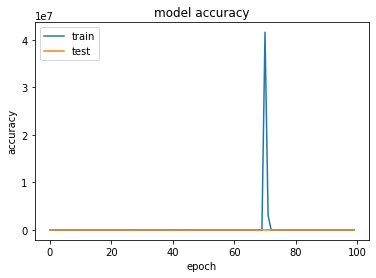

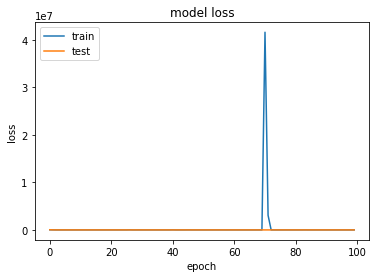

In [29]:
history=h
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

33.84541874491831
20.213471178832517
5.395398042845808


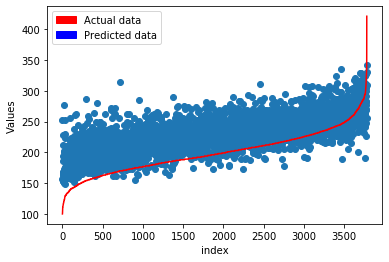

,t + 1,pred (t +1),diff
887,100.0,156.547409,56.547409
47,101.0,252.757584,151.757584
2787,106.0,228.155746,122.155746
2891,110.0,154.213943,44.213943
2148,111.0,185.153198,74.153198
1788,111.0,153.605515,42.605515
308,112.0,162.970047,50.970047
2480,114.0,167.585693,53.585693
3723,114.0,162.528946,48.528946
2854,115.0,194.043686,79.043686


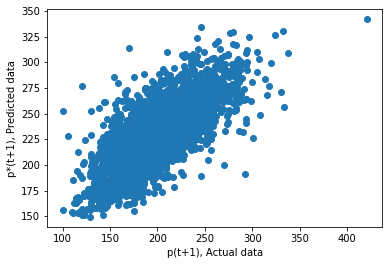

In [31]:

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)

SVR
======

In [ ]:
from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=10, gamma=0.02, epsilon=.001)
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(xtrain, ytrain) 

In [ ]:
ypred=svr_rbf.predict(xtest)

In [ ]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)